In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#create df for all the orders
orders = "orders_ods.csv"
orders_df = pd.read_csv(orders)

#drop extra row at end of csv
orders_df = orders_df.drop('Unnamed: 18', 1)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [75]:
#create df for all the returns
returns = "returns_ods.csv"
returns_df = pd.read_csv(returns)
returns_df.count()

Returned    296
Order ID    296
dtype: int64

In [76]:
#merge both dfs on Customer ID
full_orders_df = pd.merge(orders_df, returns_df, on='Order ID', how='left')


In [77]:
#replace the "NaN's" in the Returned column to "No"
full_orders_df = full_orders_df.replace(np.nan, 'No', regex=True)
full_orders_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0%,41.9136,No
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0%,219.5820,No
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0%,6.8714,No
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45%,-383.0310,No
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20%,2.5164,No


In [6]:
# rename columns sales and profit because there is a space before the first letter and after the last

full_orders_df.rename(columns = {' Profit ':'Profit', ' Sales ':'Sales'}, inplace = True)

In [7]:
# sort by category

categories_df = full_orders_df.groupby(["Category"])
categories_df.count()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
Category,,,,,,,,,,,,,,,,,,
Furniture,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
Office Supplies,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026
Technology,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


In [8]:
# get a count of how many products are in each categroy 

count_category = categories_df["Profit"].count()
print(count_category)

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Profit, dtype: int64


In [9]:
# Calculate the total revenue for each category.

revenue_category = categories_df["Profit"].sum()
revenue_category

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [10]:
# sort by sub-category

subcategories_df = full_orders_df.groupby(["Category","Sub-Category"])


In [128]:
# get a count of how many products are in each sub-categroy 

count_subcategory = subcategories_df["Profit"].count()
print(count_subcategory)

Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Profit, dtype: int64


In [12]:
# Calculate the total revenue for each sub-category.

revenue_subcategory = subcategories_df["Profit"].sum()
revenue_subcategory

Category         Sub-Category
Furniture        Bookcases       -3472.5560
                 Chairs          26590.1663
                 Furnishings     13059.1436
                 Tables         -17725.4811
Office Supplies  Appliances      18138.0054
                 Art              6527.7870
                 Binders         30221.7633
                 Envelopes        6964.1767
                 Fasteners         949.5182
                 Labels           5546.2540
                 Paper           34053.5693
                 Storage         21278.8264
                 Supplies        -1189.0995
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         3384.7569
                 Phones          44515.7306
Name: Profit, dtype: float64

 Create graph for categories, sub categories, and Sales
    

<AxesSubplot:title={'center':'Profit per Category'}, xlabel='Category', ylabel='Profit'>

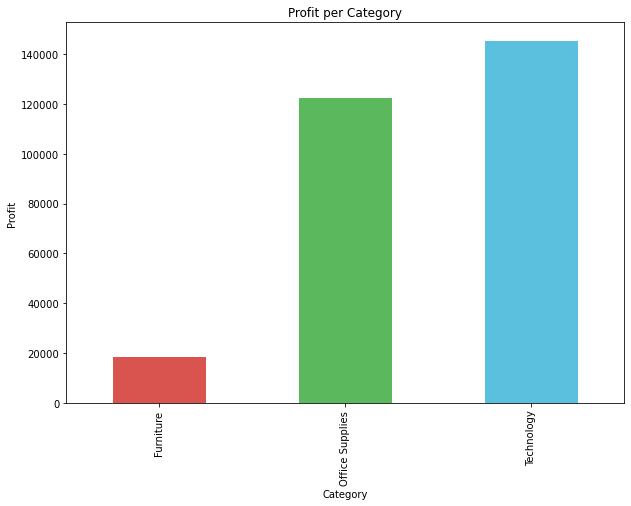

In [17]:
# Create the graph for Profit and Category
category_profit = full_orders_df.groupby(['Category'])['Profit'].sum()

category_profit.plot(kind='bar', title='Profit per Category', ylabel='Profit',
         xlabel='Category', figsize=(10, 7), color=['#d9534f','#5cb85c','#5bc0de'])

<AxesSubplot:title={'center':'Profit per Sub-Category'}, xlabel='Sub-Category', ylabel='Profit'>

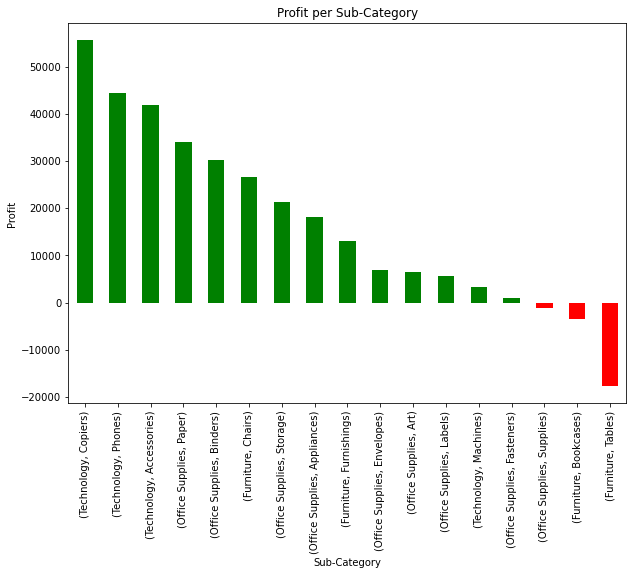

In [38]:
# Create the graph for Profit and Sub-Category

subcategory_profit = full_orders_df.groupby(["Category",'Sub-Category'])['Profit'].sum().sort_values(ascending=False)

c = ['green', 'green', 'green', 'green', 'green','green','green','green','green','green','green','green','green','green','red','red','red']
subcategory_profit.plot(kind='bar', title='Profit per Sub-Category', ylabel='Profit',
         xlabel='Sub-Category',color=c, figsize=(10, 7))


In [48]:
# sort by discount
discount_df = full_orders_df.groupby(["Discount"])

In [49]:
# get a count of how many products are in each Discount 

count_discount = discount_df["Profit"].count()
print(count_discount)

Discount
0%      4798
10%       94
15%       52
160%      16
180%       1
20%     3657
30%      227
32%       27
40%      206
45%       11
50%       66
60%      122
70%      418
80%      299
Name: Profit, dtype: int64


In [50]:
# Calculate the total revenue for each Discount.

revenue_discount = discount_df["Profit"].sum()
revenue_discount

Discount
0%      320987.6032
10%       9029.1770
15%       1418.9915
160%     -1092.6305
180%        -3.8160
20%      90337.3060
30%     -10369.2774
32%      -2391.1377
40%     -23057.0504
45%      -2493.1111
50%     -20506.4281
60%      -4852.0247
70%     -40075.3569
80%     -30535.2232
Name: Profit, dtype: float64

<AxesSubplot:title={'center':'Profit per Discount'}, xlabel='Discount', ylabel='Profit'>

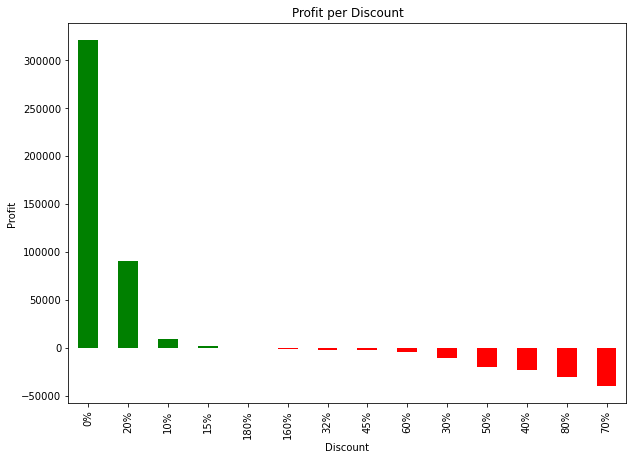

In [126]:
# make a line Graph of discounted revenue

discount_graph = full_orders_df.groupby(['Discount'])['Profit'].sum().sort_values(ascending=False)
c = ['green', 'green', 'green', 'green', 'red','red','red','red','red','red','red','red','red','red']
discount_graph.plot(kind='bar', title='Profit per Discount', ylabel='Profit',
         xlabel='Discount',color=c, figsize=(10, 7))

In [45]:
# sort by segment
segment_df = full_orders_df.groupby(["Segment"])


In [85]:
# get a count of how many products are in each segment 

count_segment = segment_df["Profit"].count()
print(count_segment)

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Profit, dtype: int64


In [86]:
# Calculate the total revenue for each Segment.

revenue_segment = segment_df["Profit"].sum()
revenue_segment

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [91]:
# sort by sub category and returns
# created df with all returned
returned_sub = full_orders_df[(full_orders_df["Returned"] == 'Yes')]
returned_sub.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
18,CA-2014-143336,8/27/14,9/1/14,Second Class,ZD-21925,Consumer,San Francisco,California,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.56,2,0%,2.4824,Yes
19,CA-2014-143336,8/27/14,9/1/14,Second Class,ZD-21925,Consumer,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,20%,16.0110,Yes
20,CA-2014-143336,8/27/14,9/1/14,Second Class,ZD-21925,Consumer,San Francisco,California,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,20%,7.3840,Yes
55,CA-2016-111682,6/17/16,6/18/16,First Class,TB-21055,Consumer,Troy,New York,12180,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,6,0%,52.1400,Yes
56,CA-2016-111682,6/17/16,6/18/16,First Class,TB-21055,Consumer,Troy,New York,12180,East,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,5,0%,15.5520,Yes


In [92]:
# find returned items of all subcategories
subcategory_return = returned_sub.groupby(["Sub-Category"])


In [94]:
# get a count of how many products were returned per sub-category 

count_returned = subcategory_return["Returned"].count()
print(count_returned)

Sub-Category
Accessories     61
Appliances      40
Art             47
Binders        137
Bookcases       16
Chairs          53
Copiers          5
Envelopes       13
Fasteners       19
Furnishings     72
Labels          21
Machines        13
Paper          123
Phones          77
Storage         57
Supplies        16
Tables          30
Name: Returned, dtype: int64


In [96]:
returned_list = count_returned.tolist()
returned_list

[61, 40, 47, 137, 16, 53, 5, 13, 19, 72, 21, 13, 123, 77, 57, 16, 30]

In [100]:
# list of count of purchase items per sub-category

subcategories_only = full_orders_df.groupby(["Sub-Category"])
list_count_subcategory = subcategories_only["Profit"].count()

subcategory_all_list = list_count_subcategory.tolist()
subcategory_all_list

[775,
 466,
 796,
 1523,
 228,
 617,
 68,
 254,
 217,
 957,
 364,
 115,
 1370,
 889,
 846,
 190,
 319]

In [111]:
#create list for sub-categories
sub_name_list = full_orders_df['Sub-Category'].tolist()
sub_name_list.sort()
sub = []
for i in sub_name_list:
    if i not in sub:
        sub.append(i)
sub

['Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables']

In [123]:
sub_return_df = pd.DataFrame(
    {'Sub-Category': sub,
     'Items Purchased': subcategory_all_list,
     'Items Returned': returned_list
    })
sub_return_df["% Returned"] = sub_return_df["Items Returned"].div(sub_return_df["Items Purchased"].values) * 100

In [124]:
sub_return_df.head(20)

,Sub-Category,Items Purchased,Items Returned,% Returned
0,Accessories,775,61,7.870968
1,Appliances,466,40,8.583691
2,Art,796,47,5.904523
3,Binders,1523,137,8.995404
4,Bookcases,228,16,7.017544
5,Chairs,617,53,8.589951
6,Copiers,68,5,7.352941
7,Envelopes,254,13,5.118110
8,Fasteners,217,19,8.755760
9,Furnishings,957,72,7.523511
